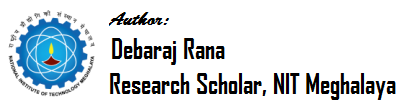

# **MNIST Handwritten Digit Classification using CNN**

**(With Full Explanation)**

**Load the MNIST Dataset**

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

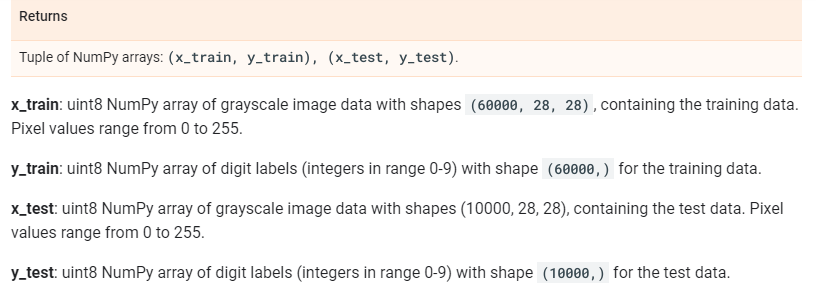

In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Display the shape of each train and test data**

In [ ]:
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (60000, 28, 28)
Shape of y_train =  (60000,)
Shape of X_test =  (10000, 28, 28)
Shape of y_test =  (10000,)


This dataset consists of 70,000 images of handwritten digits from 0–9, from which train and test has been splitted in to 85:15 ratio. So train data set contain 60000 images and test data contain 10000 images. Each of image size is 28x28

**Lets Visualize the data set (any one from train and test) as array of integers**

In [ ]:
print('Shape of one image', X_train[1].shape)
print(X_train[1])

Shape of one image (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

**Visualize the data as an images**

X_train[1] Shape is =  (28, 28)


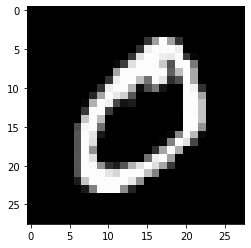

In [ ]:
import matplotlib.pyplot as plt
print('X_train[1] Shape is = ',X_train[1].shape)
plt.imshow(X_train[1],cmap='gray') #plot the second image in the dataset
plt.show()

**Visualize the Output Y**

In [ ]:
print('Tha value at y_train[1] =',y_train[1])
print('Tha entire y_train =',y_train)
print('Tha shape y_train =',y_train.shape)

Tha value at y_train[1] = 0
Tha entire y_train = [5 0 4 ... 5 6 8]
Tha shape y_train = (60000,)


In [ ]:
print('Tha value at y_test[1] =',y_test[1])
print('Tha entire y_test =',y_test)
print('Tha shape y_test =',y_test.shape)

Tha value at y_test[1] = 2
Tha entire y_test = [7 2 1 ... 4 5 6]
Tha shape y_test = (10000,)


The train data contain 60000 images each with 28x28, where are the test data contain 60000 values as 0-9 (can be called as label). The same will be true for test data but the number of data in test set are 10000

**Data Normalization**

Test Images and train images are normalize by diving all pixel by 255. Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. Noamalization is done for input train and test not for output data.

In [ ]:
# Normalize the data 
X_train = X_train / 255
X_test = X_test / 255
print(X_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Data Pre-processing**

we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

**One-hot-encode’ for target variable**

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

The class vector to be converted into a matrix (integers from 0 to num_classes). The num_classes	is the total number of classes. If provided None, then this would be inferred as the (largest number in the class vector) + 1. The default
input is'float32'.

Let the input vector length is m, then it returns a matrix of binary data mxn where n is max(input vector)+1. Each row represent one hot code for one data in the vector.

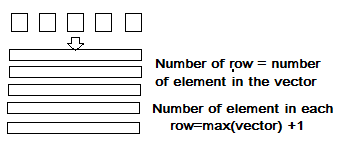


In [ ]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_test_org=y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Build Keras CNN Model using Sequential API**

**2D Convolution**

A CNN model can be created by simply calling Sequential() API.

Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.
We use the ‘add()’ function to add layers to our model.
Our first layers are is Conv2D layers. This is convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

Function used is : **tf.keras.layers.Conv2D()**

It has many parameters: (Lets Check Some parameters)

**filters-** This mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from. It is an integer value and also determines the number of output filters in the convolution. it is always recommended to use powers of 2 as the values. We have used 64 in our model.

**kernel_size** - Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix
This parameter determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.It is an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.

**strides** - The strides parameter is a 2-tuple of integers, specifying the “step” of the convolution along the x and y axis of the input volume.
This parameter is an integer or tuple/list of 2 integers, specifying the “step” of the convolution along with the height and width of the input volume.
Its default value is always set to (1, 1)

**padding** - The padding parameter of the Keras Conv2D class can take one of two values: ‘valid’ or ‘same’. **Padding= “valid”** parameter means that the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution. Where as **padding=”same”** means it can preserve spatial dimensions of the volume such that the output volume size matches the input volume size, by setting the value to the “same”.
default Keras Conv2D value is valid.

**activation** - The activation parameter to the Conv2D class is simply a convenience parameter which allows you to supply a string, which specifies the name of the activation function you want to apply after performing the convolution. Some activation functions are: 
Activation Functions: =[sigmoid, tanh, relu, leaky relu, …..]


Our first layer also takes in an **input shape.** This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.



Function used : 

from keras.models import Sequential

from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))


**MAXPOOLING Layer**

The convolutional layer generate a feature map. The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarizing the features lying within the region covered by the filter. 

**Pooling layers** are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.
The pooling layer summarises the features present in a region of the feature map generated by a convolution layer.

**Types of Pooling Layers:**

**Max Pooling** : Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter.

**Average Pooling** : Average pooling computes the average of the elements present in the region of feature map covered by the filter.

The function used ia :
tf.keras.layers.MaxPooling2D (
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)

from keras.layers import MaxPooling2D

model.add(MaxPooling2D(2))


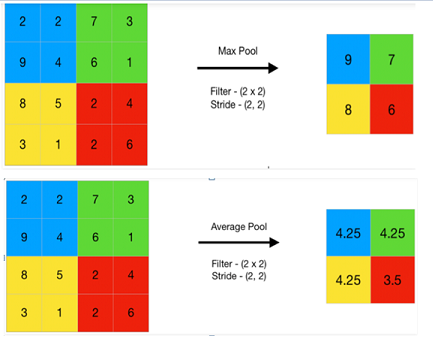



**Flatten Layer**

In between the Conv2D layers and the Dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers. The Dense layer is a fully connected layer, so the flatten layer flatten the extracted feature map extrated from convolutional and pooling layer. The function used is:

*from keras.layers import Flatten*

*model.add(Flatten())* 

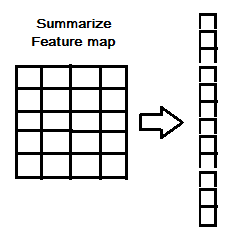

**DENSE Layer**:

Creates a new Dense layer and add it into the model. Dense layer provided by Keras, which accepts the number of neurons or units as its required parameter.

First parameter represents the number of units (neurons). activation represent activation to be used. Softmax function is set as value.

In the network, we have added the dense layer as the output layer, so number of neurons specified as 10 with activation function as softmax. 

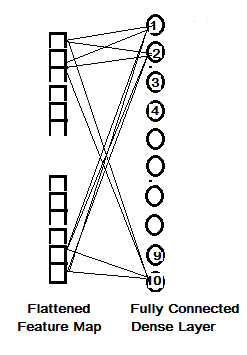


**The CNN Model Structure**

The CNN model structure is as shown below: 

The input image is gray scale image with height and width as (m x n)= 28 x 28, so the **input shape is (m, n, 1) = (28, 28, 1)**.

**Number of filer = 64**

**Kernel Size = (3 x 3)** 

**Activation Function = ReLU**

**Padding= Valid (no padding)** : after concolution the output shape will be (26, 26, 64)

MaxPooling : The **max pooling kernel = (2, 2) with stride=2**

The Dense Layer: It is the **final output** layer with **number of nodes = 10** as per required number of output.

**Activation Function used at output = softmax**

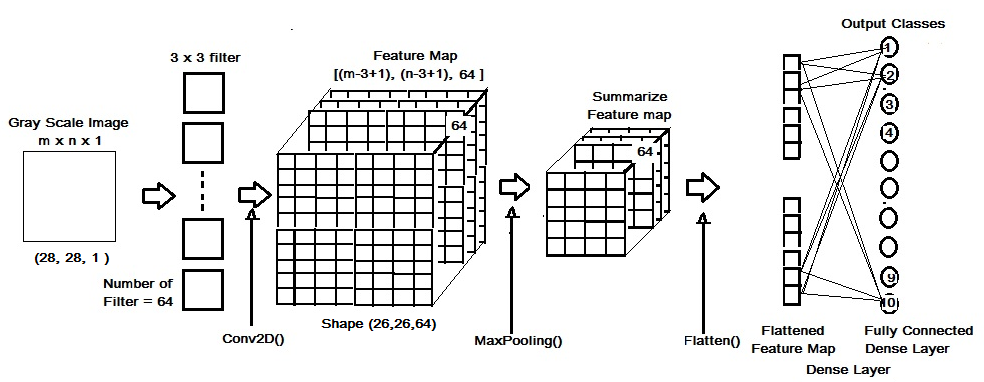

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Another Approach

#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import datasets, layers, models
#model = keras.Sequential([
#    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
#    layers.MaxPooling2D((2,2)),
#    layers.Flatten(),
#    layers.Dense(10, activation='softmax')
#]) 

**Compile the Model using compile API**

Keras model provides a method, compile() to compile the model. The argument and default value of the compile() method is as follows

compile( optimizer, loss = None, metrics = None)
The important arguments are as follows −

•	Optimizer

•	loss function

•	metrics


---



Optimization is an important process which optimizes the input weights by comparing the prediction and the loss function.

Loss function is used to find error or deviation in the learning process.

Metrics is used to evaluate the performance of your model. 

**Model Training using fit API**

Models are trained by NumPy arrays using fit(). The main purpose of this fit function is used to evaluate your model on training. 

model.fit(X, y, epochs = , batch_size = )
Here,

•	X, y − It is a tuple to evaluate your data.

•	epochs − no of times the model is needed to be evaluated during training.

•	batch_size − training instances. (Not taken here)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1831 - accuracy: 0.9475
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0710 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0535 - accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0441 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0355 - accuracy: 0.9890


**Model Evaluation**

Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. Keras model provides a function, evaluate which does the evaluation of the model. It has three main arguments,

•	Test data

•	Test data label

•	verbose - true or false  (By default verbose 1)

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

[======================================]

verbose=2 will just mention the number of epoch like this:

Epoch 1/10


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0506 - accuracy: 0.9841


[0.05056855455040932, 0.9840999841690063]

**Model Prediction**

Prediction is the final step and our expected outcome of the model generation. Keras provides a method, predict to get the prediction of the trained model
For a input it gives the predicted output, if the input is set of data set, then the predicted output also set of values.

Each predicted for 10000 test set has 10 values due to 10 number of output node. Out of 10 values for an input data, the maximum value position give the predicted output.

In [ ]:
y_predicted = model.predict(X_test)
print('Shape of y_predicted = ',y_predicted.shape)
y_predicted[0] # It display the the predicted 10 values for input index 0, need to find the maximum  value position 

print(X_test.shape)

Shape of y_predicted =  (10000, 10)
(10000, 28, 28, 1)


**Manual Check for a input data** 

In the prdicted ouput, as the output node are 10, so it gives 10 values for a given prediction for a input data, out of 10 values, the maximum value position will give the final predicted output.

The position for maximum value will get via **numpy.argmax()** function

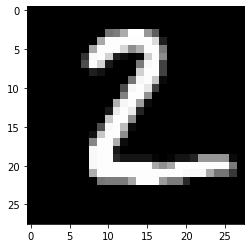

In [ ]:
# Lets us check the test data for index 1 and visualize as an image
plt.imshow(X_test[1].reshape(28,28),cmap='gray') #plot the second image in the dataset
plt.show()

In [ ]:
# Now lets us check the maximum position for the index 1 predicted data series

import numpy as np
print('Shape of y_predicted = ',y_predicted.shape)
print('The predicted value for input test data with index 1 = ')
print(np.argmax(y_predicted[1]))

Shape of y_predicted =  (10000, 10)
The predicted value for input test data with index 1 = 
2


In [ ]:
# Find the predicted output for the input 10000 test data using for loop  
y_predicted_labels=[]
for i in range(len(y_predicted)):
  tmp=y_predicted[i]
  pos=np.argmax(tmp)
  y_predicted_labels.append(pos)
print(y_predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# Display the first five predicted values
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

**Test the predicted output for an user defined input**

Lets us take an 28x28 siz ehand written digit image, let 'three' creted using paint as shown below

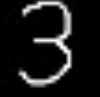

Upload the image to the current session of the file browser in colab. Read the image convert to gray scale using cv2 library.

Normalize the image data and flatten the normalize data using reshape to 1x784, then predict the output using the model.predict() function. Finaly verify the predicted output with taken input.


**User defined test data**

Shape of original image =  (28, 28, 3)
Shape of Grayscale image =  (28, 28)


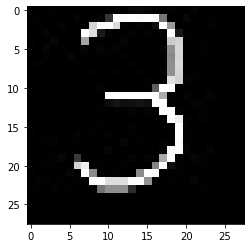

In [ ]:
import cv2
im=cv2.imread('three.jpg')
print('Shape of original image = ',im.shape)
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
print('Shape of Grayscale image = ',img.shape)
plt.imshow(img,cmap='gray') 
plt.show()

**Normalize and Reshape Data**

The input test data is normalize by diving all pixel by 255. Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution.

As per the structure of the model it take input with four dimension (no of input, height, width, no of channel). The the test image whixh has been now a gray scale image has to reshape to required format. [Here the format is (1, 28,28,1)]

In [ ]:
# Normalize the data by dividing each pixel value by 255
nw_test = img / 255
# Reshape the test image to (1,28,28,1)
nw_test_input=nw_test.reshape(1,28,28,1)
print('The shape of image data = ',nw_test_input.shape)

The shape of image data =  (1, 28, 28, 1)


**Prediction Output**

In [ ]:
nw_predicted = model.predict(nw_test_input)
pval=np.argmax(nw_predicted)
print('The predicted value for the user defined test image: ', pval)


The predicted value for the user defined test image:  3


**Confusion Matrix using tf.math.confusion_matrix API**

Computes the confusion matrix from predictions and labels.

***tf.math.confusion_matrix(labels, predictions)***

The matrix columns represent the prediction labels and the rows represent the real labels. The confusion matrix is always a 2-D array of shape [n, n], where n is the number of valid labels for a given classification task. Both prediction and labels must be 1-D arrays of the same shape in order for this function to work.

**Returns**

A Tensor of type dtype with shape [n, n] representing the confusion matrix, where n is the number of possible labels in the classification task.

From the test and predicted labels , it automatically determine the discinct label and computes the confusion matrix.



In [ ]:
import numpy as np
import tensorflow as tf
print('Length of y_test = ',len(y_test_org))
print('The unique labels of y_test = ',np.unique(y_test_org))
print('Length of y_predicted_labels = ',len(y_predicted_labels))
print('The unique labels of y_predicted_labels = ',np.unique(y_predicted_labels))

cm = tf.math.confusion_matrix(labels=y_test_org,predictions=y_predicted_labels)

print('Shape of Confusion Matrix = ',cm.shape)
print(cm)

Length of y_test =  10000
The unique labels of y_test =  [0 1 2 3 4 5 6 7 8 9]
Length of y_predicted_labels =  10000
The unique labels of y_predicted_labels =  [0 1 2 3 4 5 6 7 8 9]
Shape of Confusion Matrix =  (10, 10)
tf.Tensor(
[[ 973    0    1    1    0    1    1    0    3    0]
 [   0 1129    2    2    1    0    0    1    0    0]
 [   1    1 1014    3    1    0    0    7    5    0]
 [   0    0    0  999    0    8    0    1    2    0]
 [   2    0    0    0  962    0    2    2    2   12]
 [   0    0    0    4    0  885    1    0    1    1]
 [   6    2    0    1    2    8  936    0    3    0]
 [   0    1    8    3    0    0    0 1012    1    3]
 [   5    0    3    5    1    3    0    3  952    2]
 [   1    0    0    5    8   10    0    4    2  979]], shape=(10, 10), dtype=int32)


**Plot the confusion Matrix using Seaborn**

seaborn.heatmap(data, annot=True, fmt='d')

Plot rectangular data as a color-encoded matrix.

**Parameters**

data : rectangular dataset
2D dataset that can be coerced into an ndarray. 

annot : bool optional
If True, write the data value in each cell. 

fmt : str, optional
String formatting code to use when adding annotations. 'd' used to display integer values



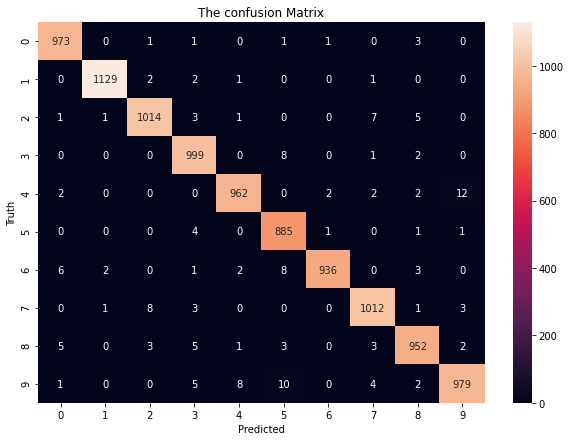

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('The confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Converts a Keras model to dot format and save to a file using tf.keras.utils.plot_model**


tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True)

•	model	A Keras model instance

•	to_file	File name of the plot image.

•	show_shapes--	whether to display shape information.

•	show_dtype--	whether to display layer dtypes.

•	show_layer_names--	whether to display layer names.



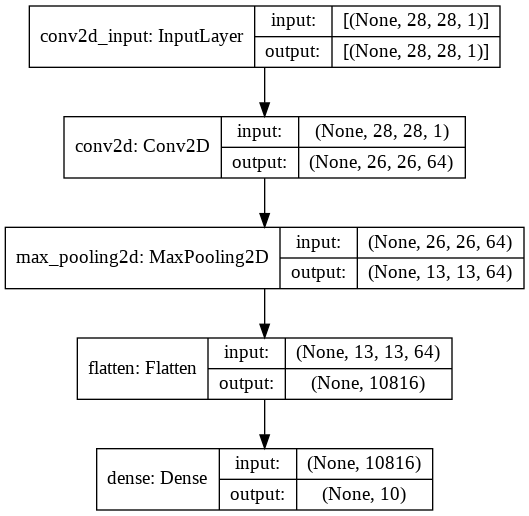

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model( model, to_file='model.png', show_shapes=True, show_layer_names=True)

**Summary of the Model**

The summary can be generated using model.summary() function

It provides a quick and dirty overview of the components of your Keras model. The names of your layers, their types, as well as the shape of the data that they output and the number of trainable parameters.

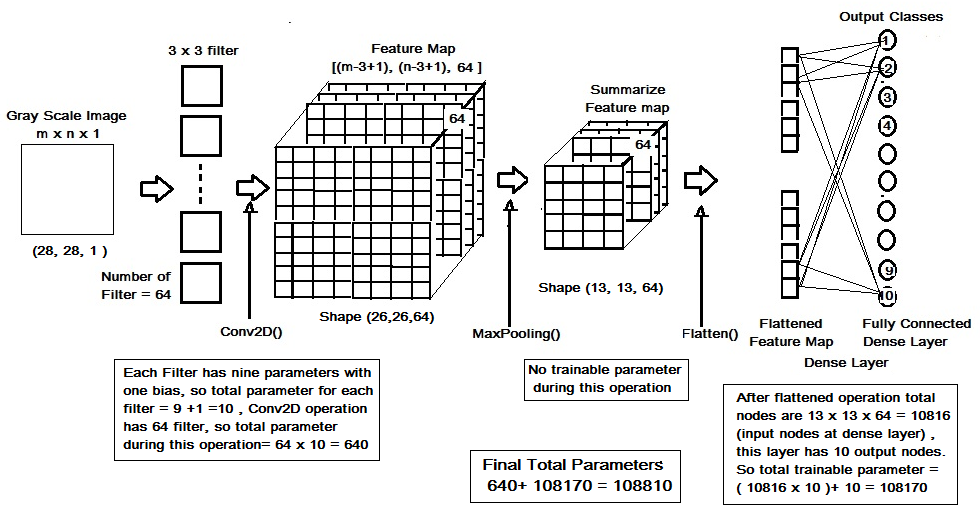


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


**Save and Load tf.Model**

tf.Model and tf.Sequential both provide a function model.save that allow you to save the topology and weights of a model.

model.save('modelname')

**Loading a tf.Model**

Given a model that was saved using one of the methods above, we can load it using the tf.keras.models.load_model API.

tf.keras.models.load_model(ModelFileName, compile=True)

Args
ModelFileName
Compile: 	Boolean, whether to compile the model after loading.

**Returns** : A Keras model instance. If the original model was compiled, and saved with the optimizer, then the returned model will be compiled. Otherwise, the model will be left uncompiled. In the case that an uncompiled model is returned, a warning is displayed if the compile argument is set to True.


In [ ]:
model.save('mymodel');

INFO:tensorflow:Assets written to: mymodel/assets


In [ ]:
import tensorflow as tf
new_model=tf.keras.models.load_model('mymodel',compile=True);

**Peform the Prediction using the Loaded Model**

The Loded Model(my model) to the variable new_model and prediction done to the earlier user defined flttened data : nw_test_flattened, which result we got as six

Lets Try ----

In [ ]:
nw_predicted = new_model.predict(nw_test_input)
npval=np.argmax(nw_predicted)
print('The predicted value for the user defined test image with the loaded Model: ', npval)

The predicted value for the user defined test image with the loaded Model:  3
